# Loading libraries

In [257]:
import os
import pandas as pd
import numpy as np
from sklearn import neighbors
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import scipy
import plotly.plotly as py1
from scipy.stats import linregress
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from pylab import *
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import statistics
import csv
from sklearn.preprocessing import Imputer

In [258]:
# Creating workspace

os.chdir('C:/Users/SAYAN/Desktop/Data Science/Projects/Python Folder/Jupyter Folder For DA')

In [259]:
# Confirming workspace

os.getcwd()

'C:\\Users\\SAYAN\\Desktop\\Data Science\\Projects\\Python Folder\\Jupyter Folder For DA'

In [260]:
%config IPCompleter.greedy=True

In [261]:
# Reading excel file

data = pd.read_excel('Absenteeism_at_work_Project.xls')

In [182]:
# Datatype finding

type(data)

pandas.core.frame.DataFrame

In [263]:
data['Month of absence'].mode()

0    3.0
dtype: float64

# Converting datatype and replacing values

In [264]:
# Converting variable "Reason for Absence" as string

data['Reason for absence']=(data['Reason for absence']).astype(str)

# Replacing values as per data

# With ICD :

data['Reason for absence'] = data['Reason for absence'].replace('1.0','Certain infectious and parasitic diseases')
data['Reason for absence'] = data['Reason for absence'].replace('2.0','Neoplasms')
data['Reason for absence'] = data['Reason for absence'].replace('3.0','Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism')
data['Reason for absence'] = data['Reason for absence'].replace('4.0','Endocrine, nutritional and metabolic diseases')
data['Reason for absence'] = data['Reason for absence'].replace('5.0','Mental and behavioural disorders')
data['Reason for absence'] = data['Reason for absence'].replace('6.0','Diseases of the nervous system')
data['Reason for absence'] = data['Reason for absence'].replace('7.0','Diseases of the eye and adnexa')
data['Reason for absence'] = data['Reason for absence'].replace('8.0','Diseases of the ear and mastoid process')
data['Reason for absence'] = data['Reason for absence'].replace('9.0','Diseases of the circulatory system')
data['Reason for absence'] = data['Reason for absence'].replace('10.0','Diseases of the respiratory system')
data['Reason for absence'] = data['Reason for absence'].replace('11.0','Diseases of the digestive system')
data['Reason for absence'] = data['Reason for absence'].replace('12.0','Diseases of the skin and subcutaneous tissue')
data['Reason for absence'] = data['Reason for absence'].replace('13.0','Diseases of the musculoskeletal system and connective tissue')
data['Reason for absence'] = data['Reason for absence'].replace('14.0','Diseases of the genitourinary system')
data['Reason for absence'] = data['Reason for absence'].replace('15.0','Pregnancy, childbirth and the puerperium')
data['Reason for absence'] = data['Reason for absence'].replace('16.0','Certain conditions originating in the perinatal period')
data['Reason for absence'] = data['Reason for absence'].replace('17.0','Congenital malformations, deformations and chromosomal abnormalities')
data['Reason for absence'] = data['Reason for absence'].replace('18.0','Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified')
data['Reason for absence'] = data['Reason for absence'].replace('19.0','Injury, poisoning and certain other consequences of external causes')
data['Reason for absence'] = data['Reason for absence'].replace('20.0','External causes of morbidity and mortality')
data['Reason for absence'] = data['Reason for absence'].replace('21.0','Factors influencing health status and contact with health services')

# Without ICD

data['Reason for absence'] = data['Reason for absence'].replace('22.0','patient follow-up')
data['Reason for absence'] = data['Reason for absence'].replace('23.0','medical consultation')
data['Reason for absence'] = data['Reason for absence'].replace('24.0','blood donation')
data['Reason for absence'] = data['Reason for absence'].replace('25.0','laboratory examination')
data['Reason for absence'] = data['Reason for absence'].replace('26.0','unjustified absence')
data['Reason for absence'] = data['Reason for absence'].replace('27.0','physiotherapy')
data['Reason for absence'] = data['Reason for absence'].replace('28.0','dental consultation')

# Day of the week

data['Day of the week'] = data['Day of the week'].replace(3,'Tuesday')
data['Day of the week'] = data['Day of the week'].replace(2,'Monday')
data['Day of the week'] = data['Day of the week'].replace(4,'Wednesday')
data['Day of the week'] = data['Day of the week'].replace(5,'Thursday')
data['Day of the week'] = data['Day of the week'].replace(6,'Friday')

# Seasons

data['Seasons'] = data['Seasons'].replace(1,'summer')
data['Seasons'] = data['Seasons'].replace(2,'autumn')
data['Seasons'] = data['Seasons'].replace(3,'winter')
data['Seasons'] = data['Seasons'].replace(4,'spring')

# Disciplinary failure

data['Disciplinary failure'] = data['Disciplinary failure'].replace(1,'yes')
data['Disciplinary failure'] = data['Disciplinary failure'].replace(0,'no')

# Education

data['Education'] = data['Education'].replace(1,'high school')
data['Education'] = data['Education'].replace(2,'graduate')
data['Education'] = data['Education'].replace(3,'postgraduate')
data['Education'] = data['Education'].replace(4,'master and doctor')

# Social smoker

data['Social smoker'] = data['Social smoker'].replace(1,'yes')
data['Social smoker'] = data['Social smoker'].replace(0,'no')

# Social drinker

data['Social drinker'] = data['Social drinker'].replace(1,'yes')
data['Social drinker'] = data['Social drinker'].replace(0,'no')



# Sorting dataset by ID

In [266]:
# Sorting dataset by ID

data = data.sort_values(by=['ID']).reset_index(drop=True)

# Missing value imputation with mode() for categorical variables

In [267]:
data['Reason for absence'] = data['Reason for absence'].fillna('0.0')

#data['Reason for absence'].mode()

data['Reason for absence'] = data['Reason for absence'].replace('0.0','medical consultation') # as mode for data['Reason for absence']='medical consultation'

data['Month of absence'] = data['Month of absence'].fillna('0.0') # filling nan values with 0.0

#data['Month of absence'].mode()

data['Month of absence'] = data['Month of absence'].replace('0.0','3.0') # as mode for data['Month of absence']='3'


data['Disciplinary failure'] = data['Disciplinary failure'].fillna(0.0) # filling nan values with 0.0

#data['Disciplinary failure'].mode()

data['Disciplinary failure'] = data['Disciplinary failure'].replace(0.0,'no') # as mode for data['Disciplinary failure']='no'

data['Education'] = data['Education'].fillna(0.0) # filling nan values with 0.0

#data['Education'].mode()

data['Education'] = data['Education'].replace(0.0,'high school') # as mode for data['Education']='high school'

data['Social drinker'] = data['Social drinker'].fillna(0.0) # filling nan values with 0.0

#data['Social drinker'].mode()

data['Social drinker'] = data['Social drinker'].replace(0.0,'yes') # as mode for data['Social drinker']='yes'

data['Social smoker'] = data['Social smoker'].fillna(0.0) # filling nan values with 0.0

#data['Social smoker'].mode()

data['Social smoker'] = data['Social smoker'].replace(0.0,'no') # as mode for data['Social smoker']='no'

In [268]:
#writer = pd.ExcelWriter('Dummy1.xlsx', engine='xlsxwriter')
#data.to_excel(writer, sheet_name='Sheet1')
#writer.save()

In [269]:
missing_val = pd.DataFrame(data.isnull().sum(axis=0))
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns={'index':'Variables', 0:'Percentage of missing data'})
missing_val['Percentage of missing data'] = (missing_val['Percentage of missing data']/len(data)) * 100
#missing_val

In [270]:
#data.describe()

In [271]:
#data

# Grouping data by ID

In [272]:
#data.groupby(data.ID==1)['Distance from Residence to Work'].mean()

#len(unique(data['ID']))

# Missing value imputation of continuous variables

In [273]:
# We see that 'Transportation expense','Distance from Residence to Work','Service time','Age','Son','Pet', 'Weight','Height','Body mass index' 
#are the same for each ID.

# On the other hand,'Work load Average/day ','Hit target' and 'Absenteeism time in hours' are having random values.


data['Work load Average/day '] = data['Work load Average/day '].fillna(data['Work load Average/day '].median())

data['Hit target'] = data['Hit target'].fillna(data['Hit target'].median())

data['Absenteeism time in hours'] = data['Absenteeism time in hours'].fillna(data['Absenteeism time in hours'].median())

for i in range(1,len(unique(data['ID']))+1):
    data['Transportation expense'] = data['Transportation expense'].fillna(data.groupby(data.ID==i)['Transportation expense'].mean()[1])
    data['Distance from Residence to Work'] = data['Distance from Residence to Work'].fillna(data.groupby(data.ID==i)['Distance from Residence to Work'].mean()[1])
    data['Service time'] = data['Service time'].fillna(data.groupby(data.ID==i)['Service time'].mean()[1])
    data['Age'] = data['Age'].fillna(data.groupby(data.ID==i)['Age'].mean()[1])
    data['Son'] = data['Son'].fillna(data.groupby(data.ID==i)['Son'].mean()[1])
    data['Pet'] = data['Pet'].fillna(data.groupby(data.ID==i)['Pet'].mean()[1])
    data['Weight'] = data['Weight'].fillna(data.groupby(data.ID==i)['Weight'].mean()[1])
    data['Height'] = data['Height'].fillna(data.groupby(data.ID==i)['Height'].mean()[1])
    data['Body mass index'] = data['Body mass index'].fillna(data.groupby(data.ID==i)['Body mass index'].mean()[1])
    

In [274]:
#writer = pd.ExcelWriter('Dummy2.xlsx', engine='xlsxwriter')
#data.to_excel(writer, sheet_name='Sheet1')
#writer.save()

# Outlier analysis

In [275]:
%matplotlib inline

In [276]:
num = ['Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ','Hit target','Pet','Weight','Son','Height','Body mass index','Absenteeism time in hours']

In [277]:
q75_1,q25_1 = np.percentile(data['Transportation expense'],[75,25])
iqr1 = q75_1-q25_1 # calculate the IQR (Inter Quartile Range)
lower1 = q25_1-(1.5*iqr1)
upper1 = q75_1+(1.5*iqr1)

data['Transportation expense'][data[data.loc[:,'Transportation expense']<lower1].index]=np.nan
data['Transportation expense'][data[data.loc[:,'Transportation expense']>upper1].index]=np.nan



q75_2,q25_2 = np.percentile(data['Distance from Residence to Work'],[75,25])
iqr2 = q75_2-q25_2 # calculate the IQR (Inter Quartile Range)
lower2 = q25_2-(1.5*iqr2)
upper2 = q75_2+(1.5*iqr2)

data['Distance from Residence to Work'][data[data.loc[:,'Distance from Residence to Work']<lower2].index]=np.nan
data['Distance from Residence to Work'][data[data.loc[:,'Distance from Residence to Work']>upper2].index]=np.nan


q75_3,q25_3 = np.percentile(data['Service time'],[75,25])
iqr3 = q75_3-q25_3 # calculate the IQR (Inter Quartile Range)
lower3 = q25_3-(1.5*iqr3)
upper3 = q75_3+(1.5*iqr3)

data['Service time'][data[data.loc[:,'Service time']<lower3].index]=np.nan
data['Service time'][data[data.loc[:,'Service time']>upper3].index]=np.nan


q75_4,q25_4 = np.percentile(data['Age'],[75,25])
iqr4 = q75_4-q25_4 # calculate the IQR (Inter Quartile Range)
lower4 = q25_4-(1.5*iqr4)
upper4 = q75_4+(1.5*iqr4)

data['Age'][data[data.loc[:,'Age']<lower4].index]=np.nan
data['Age'][data[data.loc[:,'Age']>upper4].index]=np.nan


q75_5,q25_5 = np.percentile(data['Work load Average/day '],[75,25])
iqr5 = q75_5-q25_5 # calculate the IQR (Inter Quartile Range)
lower5 = q25_5-(1.5*iqr5)
upper5 = q75_5+(1.5*iqr5)

data['Work load Average/day '][data[data.loc[:,'Work load Average/day ']<lower5].index]=np.nan=np.nan
data['Work load Average/day '][data[data.loc[:,'Work load Average/day ']>upper5].index]=np.nan=np.nan


q75_6,q25_6 = np.percentile(data['Hit target'],[75,25])
iqr6 = q75_6-q25_6 # calculate the IQR (Inter Quartile Range)
lower6 = q25_6-(1.5*iqr6)
upper6 = q75_6+(1.5*iqr6)

data['Hit target'][data[data.loc[:,'Hit target']<lower6].index]=np.nan
data['Hit target'][data[data.loc[:,'Hit target']>upper6].index]=np.nan


q75_7,q25_7 = np.percentile(data['Pet'],[75,25])
iqr7 = q75_7-q25_7 # calculate the IQR (Inter Quartile Range)
lower7 = q25_7-(1.5*iqr7)
upper7 = q75_7+(1.5*iqr7)

data['Pet'][data[data.loc[:,'Pet']<lower7].index]=np.nan
data['Pet'][data[data.loc[:,'Pet']>upper7].index]=np.nan


q75_8,q25_8 = np.percentile(data['Weight'],[75,25])
iqr8 = q75_8-q25_8 # calculate the IQR (Inter Quartile Range)
lower8 = q25_8-(1.5*iqr8)
upper8 = q75_8+(1.5*iqr8)

data['Weight'][data[data.loc[:,'Weight']<lower8].index]=np.nan
data['Weight'][data[data.loc[:,'Weight']>upper8].index]=np.nan


q75_9,q25_9 = np.percentile(data['Son'],[75,25])
iqr9 = q75_9-q25_9 # calculate the IQR (Inter Quartile Range)
lower9 = q25_9-(1.5*iqr9)
upper9 = q75_9+(1.5*iqr9)

data['Son'][data[data.loc[:,'Son']<lower9].index]=np.nan
data['Son'][data[data.loc[:,'Son']>upper9].index]=np.nan


q75_10,q25_10 = np.percentile(data['Height'],[75,25])
iqr10 = q75_10-q25_10 # calculate the IQR (Inter Quartile Range)
lower10 = q25_10-(1.5*iqr10)
upper10 = q75_10+(1.5*iqr10)

data['Height'][data[data.loc[:,'Height']<lower10].index]=np.nan
data['Height'][data[data.loc[:,'Height']>upper10].index]=np.nan


q75_11,q25_11 = np.percentile(data['Body mass index'],[75,25])
iqr11 = q75_11-q25_11 # calculate the IQR (Inter Quartile Range)
lower11 = q25_11-(1.5*iqr11)
upper11 = q75_11+(1.5*iqr11)

data['Body mass index'][data[data.loc[:,'Body mass index']<lower11].index]=np.nan
data['Body mass index'][data[data.loc[:,'Body mass index']>upper11].index]=np.nan


q75_12,q25_12 = np.percentile(data['Absenteeism time in hours'],[75,25])
iqr12 = q75_12-q25_12 # calculate the IQR (Inter Quartile Range)
lower12 = q25_12-(1.5*iqr12)
upper12 = q75_12+(1.5*iqr12)

data['Absenteeism time in hours'][data[data.loc[:,'Absenteeism time in hours']<lower12].index]=np.nan
data['Absenteeism time in hours'][data[data.loc[:,'Absenteeism time in hours']>upper12].index]=np.nan


C:\Users\SAYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\SAYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\SAYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\SAYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice fro

In [278]:
#writer = pd.ExcelWriter('Data_with_NA_as_outlier.xlsx', engine='xlsxwriter')
#data.to_excel(writer, sheet_name='Sheet1')
#writer.save()

In [279]:
data['Work load Average/day '] = data['Work load Average/day '].fillna(data['Work load Average/day '].median())

data['Hit target'] = data['Hit target'].fillna(data['Hit target'].median())

data['Absenteeism time in hours'] = data['Absenteeism time in hours'].fillna(data['Absenteeism time in hours'].median())

for i in range(1,len(unique(data['ID']))+1):
    data['Transportation expense'] = data['Transportation expense'].fillna(data.groupby(data.ID==i)['Transportation expense'].mean()[1])
    data['Distance from Residence to Work'] = data['Distance from Residence to Work'].fillna(data.groupby(data.ID==i)['Distance from Residence to Work'].mean()[1])
    data['Service time'] = data['Service time'].fillna(data.groupby(data.ID==i)['Service time'].mean()[1])
    data['Age'] = data['Age'].fillna(data.groupby(data.ID==i)['Age'].mean()[1])
    data['Son'] = data['Son'].fillna(data.groupby(data.ID==i)['Son'].mean()[1])
    data['Pet'] = data['Pet'].fillna(data.groupby(data.ID==i)['Pet'].mean()[1])
    data['Weight'] = data['Weight'].fillna(data.groupby(data.ID==i)['Weight'].mean()[1])
    data['Height'] = data['Height'].fillna(data.groupby(data.ID==i)['Height'].mean()[1])
    data['Body mass index'] = data['Body mass index'].fillna(data.groupby(data.ID==i)['Body mass index'].mean()[1])
    

In [280]:
#writer = pd.ExcelWriter('Dummy3.xlsx', engine='xlsxwriter')
#data.to_excel(writer, sheet_name='Sheet1')
#writer.save()

# Feature selection

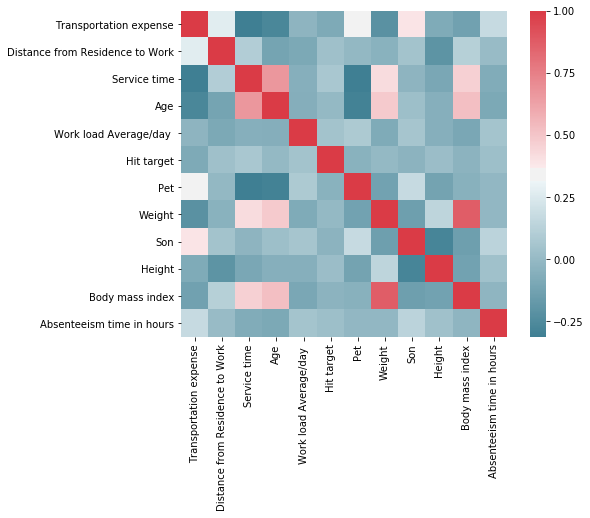

In [281]:
# Correlation analysis on continuous variables

# Null hypothesis : All independent variables are independent of each other and there is high dependency between independent
# variables and dependent (target) variable.

#data.describe()

# Listing out continuous variables

num = ['Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ','Hit target','Pet','Weight','Son','Height','Body mass index','Absenteeism time in hours']

df_continuous = data.loc[:,num]

#df_continuous

f,ax = plt.subplots(figsize=(8,6))

correlation = df_continuous.corr()

sns.heatmap(correlation,mask=np.zeros_like(correlation,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,robust=True,ax=ax)

In [282]:
# Converting to categorical variables

data['ID'] = pd.Categorical(data['ID'])
data['Reason for absence'] = pd.Categorical(data['Reason for absence'])
data['Month of absence'] = pd.Categorical(data['Month of absence'])
data['Day of the week'] = pd.Categorical(data['Day of the week'])
data['Seasons'] = pd.Categorical(data['Seasons'])
data['Disciplinary failure'] = pd.Categorical(data['Disciplinary failure'])
data['Education'] = pd.Categorical(data['Education'])
data['Social smoker'] = pd.Categorical(data['Social smoker'])
data['Social drinker'] = pd.Categorical(data['Social drinker'])

data['Reason for absence'] = data['Reason for absence'].replace('nan','medical consultation') # as mode for data['Reason for a

In [283]:
#writer = pd.ExcelWriter('Dummy4.xlsx', engine='xlsxwriter')
#data.to_excel(writer, sheet_name='Sheet1')
#writer.save()

In [284]:
#cat = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Education','Social drinker','Social smoker']
    
#formula = 'Absenteeism time in hours ~ ID + Reason for absence + ID:Reason for absence'
#model = ols(formula, data).fit()
#aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
#print(aov_table)

#data1 = [[data['ID'],data['Reason for absence'],data['Month of absence'],data['Day of the week'],data['Seasons'],data['Disciplinary failure'],data['Education'],data['Social drinker'],data['Social smoker']]
#df1 = pd.DataFrame(data1,columns=['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Education','Social drinker','Social smoker'])
#print(df1)


In [285]:
writer = pd.ExcelWriter('Dummy.xlsx', engine='xlsxwriter')
data.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [230]:
# Eliminate "Day of the week","Education","Social Smoker" from dataset as p>0.05

df1 = data

df1 = df1.drop(['Day of the week','Reason for absence','Education','Social smoker','Social drinker','Month of absence','Day of the week','Seasons','Disciplinary failure','Distance from Residence to Work','Son','Pet','Weight','Body mass index'], axis=1)

In [231]:
df1.shape

(740, 8)

In [232]:
# Normalizing the numeric variables of the data after feature selection

#data.head()
cnames = ['Transportation expense','Service time','Age','Work load Average/day ','Hit target','Height','Absenteeism time in hours']
for i in cnames:
    df1[i] = (df1[i] - min(df1[i]))/(max(df1[i]) - min(df1[i]))

In [233]:
#writer = pd.ExcelWriter('Dummy5.xlsx', engine='xlsxwriter')
#df1.to_excel(writer, sheet_name='Sheet1')
#writer.save()

In [234]:
# Decision Tree Regression model

# Train and test data

#df1 = df1.drop(['Reason for absence'], axis=0)
train,test = train_test_split(df1, test_size=0.05)

# Designing model
fit = DecisionTreeRegressor(max_depth=4).fit(train.iloc[:,0:7], train.iloc[:,7])

# Predicting values

predictions_DT = fit.predict(test.iloc[:,0:7])

In [224]:
predictions_DT

array([0.33298319, 0.24236111, 0.24236111, 0.22164352, 0.22164352,
       0.24236111, 0.22164352, 0.24236111, 0.22164352, 0.22164352,
       0.22164352, 0.33035714, 0.22164352, 0.22164352, 0.22164352,
       0.31730769, 0.33298319, 0.33298319, 0.22164352, 0.24236111,
       0.22164352, 0.22164352, 0.22164352, 0.31730769, 0.24236111,
       0.22164352, 0.22164352, 0.22164352, 0.22164352, 0.22164352,
       0.22164352, 0.22164352, 0.24236111, 0.31730769, 0.22164352,
       0.33298319, 0.22164352])

In [225]:
# Calculate MAPE

def find_mape(y_actual,y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100
    return mape

In [226]:
find_mape(test.iloc[:,7], predictions_DT)

inf